In [43]:
import cv2
import numpy as np
import os
from IPython.display import Image
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_columns = 120
plt.rcParams["figure.figsize"] = (20,20)

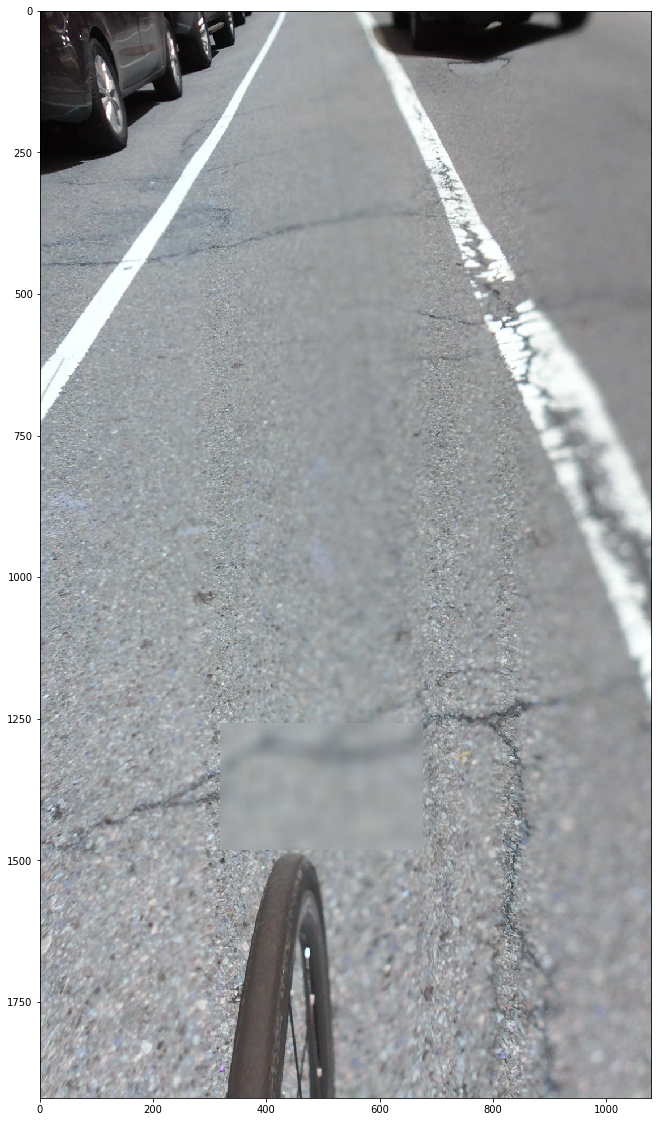

In [44]:
#importing base image
base = cv2.imread('pictures/441358_cf70c_5932ee2800e41.jpg', 1)
#base_crop = base[0:200,150:350,:]
plt.imshow(base)

### Creating rectangle mask

In [45]:
'''
https://stackoverflow.com/questions/25074488/how-to-mask-an-image-using-numpy-opencv
'''
height,width = base.shape[0:2]
rectangle_img = np.zeros((height,width), np.uint8)
'''
code below draws a rectangle with upper left point at (0,500),
lower right point at (right edge, 1750), gives in a color (255,0,0) 
and fills it in (thickness=-1)
'''
cv2.rectangle(rectangle_img,(0,500),(rectangle_img.shape[1],1750),(255,0,0),-1)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [46]:
masked_rectangle = cv2.bitwise_and(base, base, mask=rectangle_img)

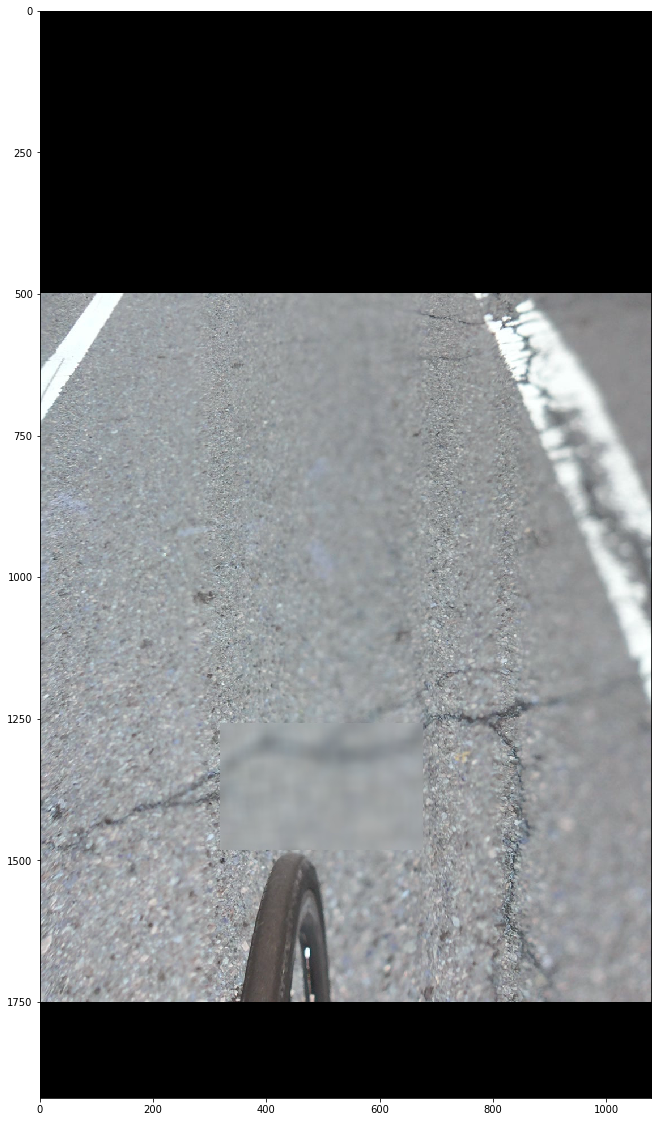

In [47]:
plt.imshow(masked_rectangle)

## Detect Lines / Features

#### Using SIFT to find "important points"

In [48]:
### SIFT!

sift = cv2.xfeatures2d.SIFT_create()
kp = sift.detect(masked_rectangle,None)

img_w_key_points=cv2.drawKeypoints(masked_rectangle, kp, None)

cv2.imwrite('sift_keypoints.jpg',img_w_key_points)

True

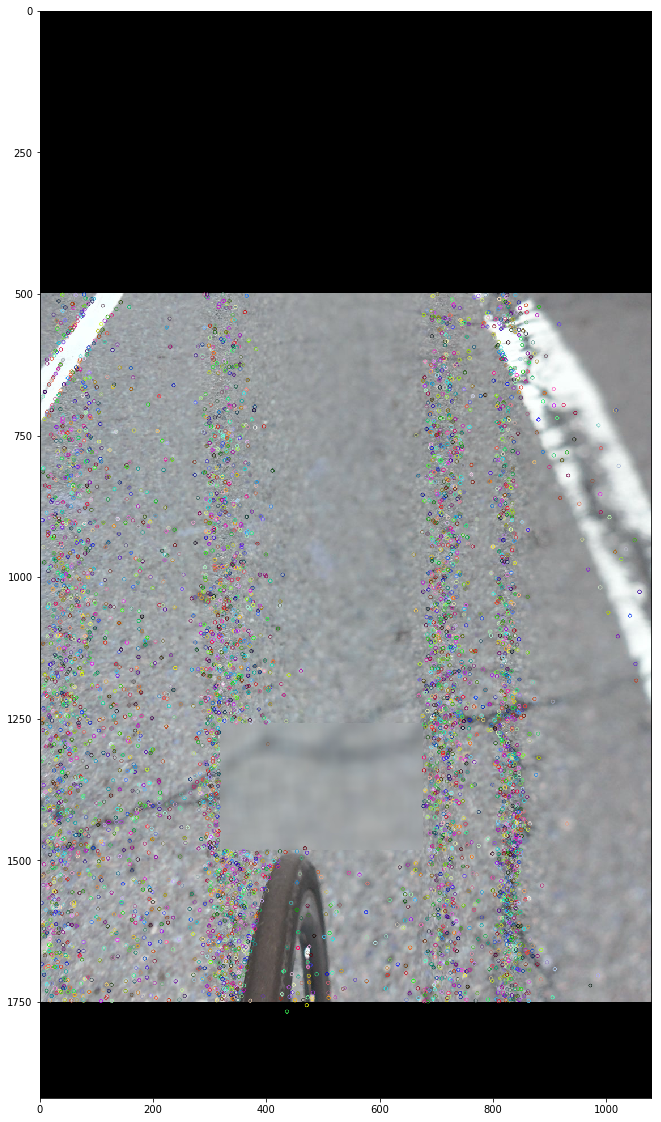

In [49]:
plt.imshow(img_w_key_points)

#### Using canny to find features / lines

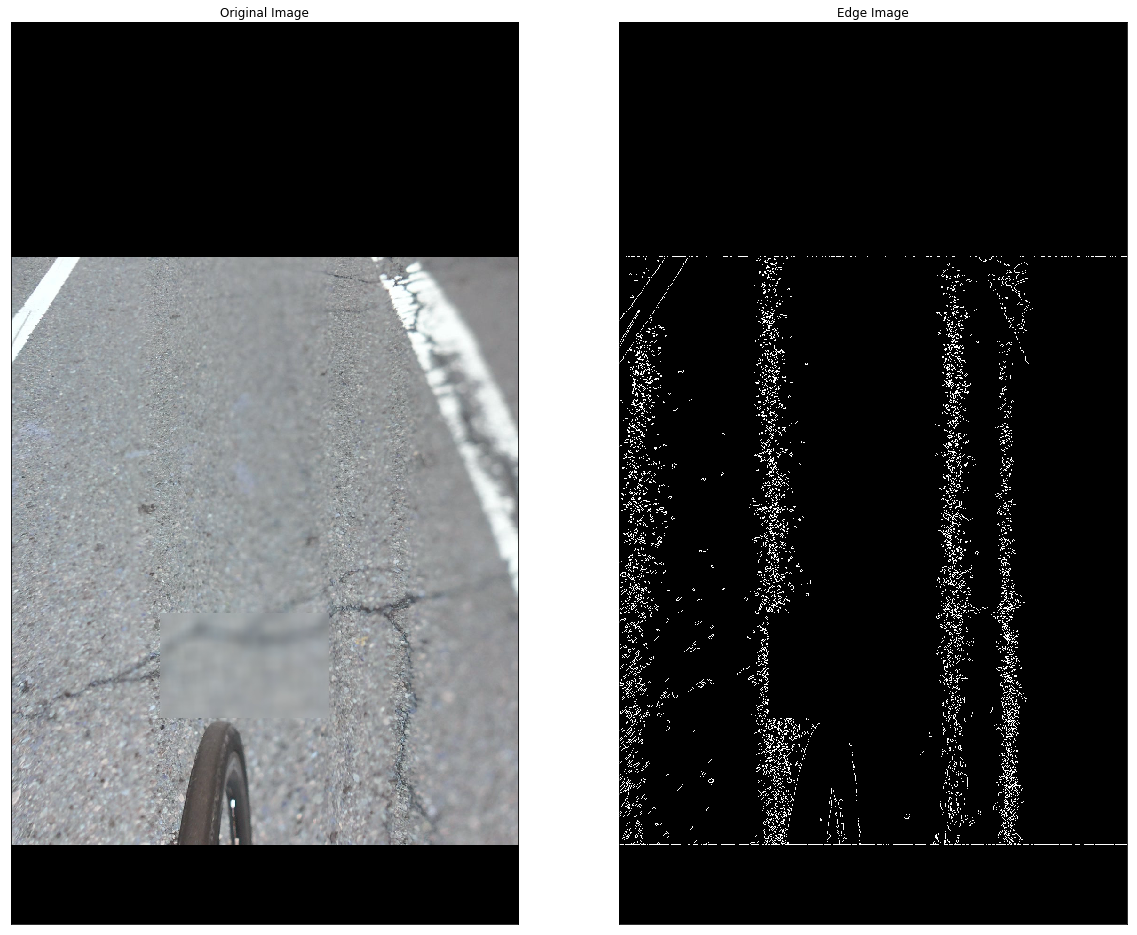

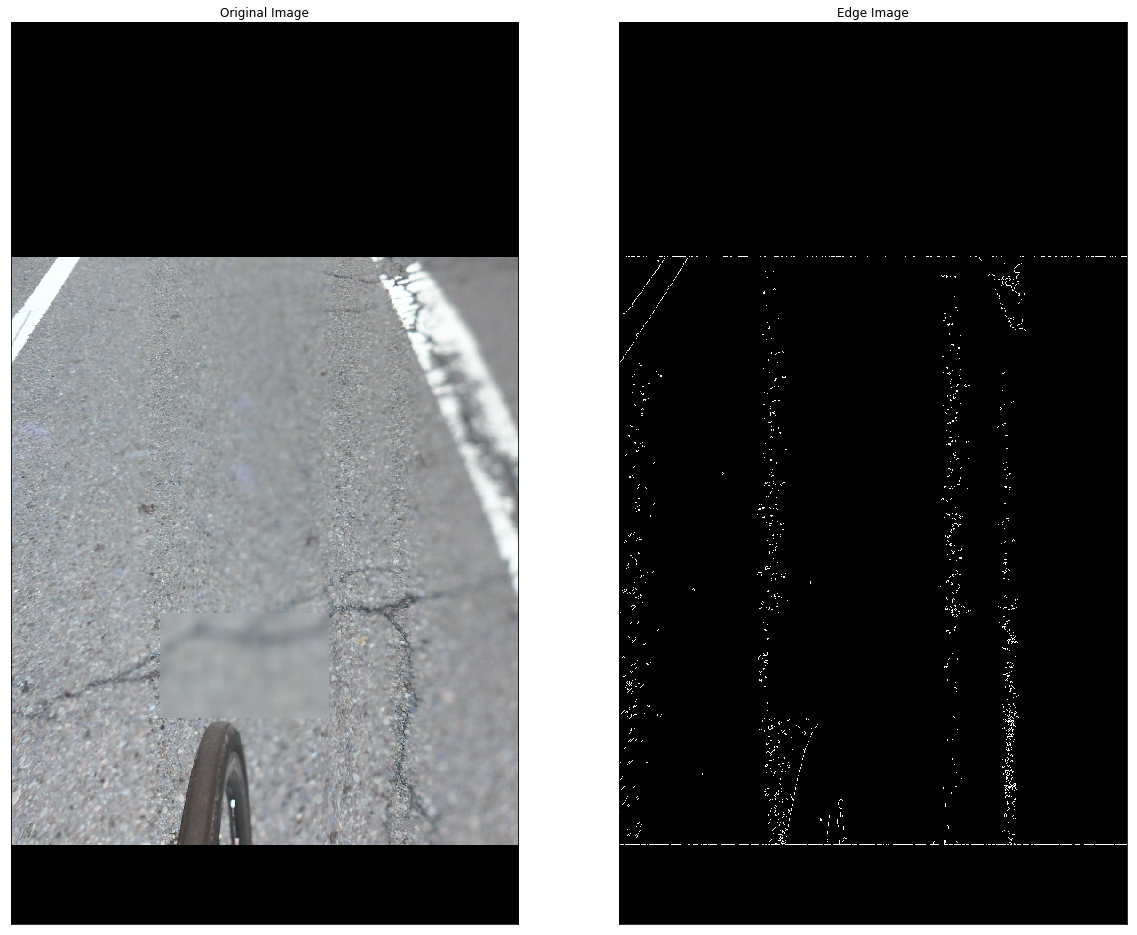

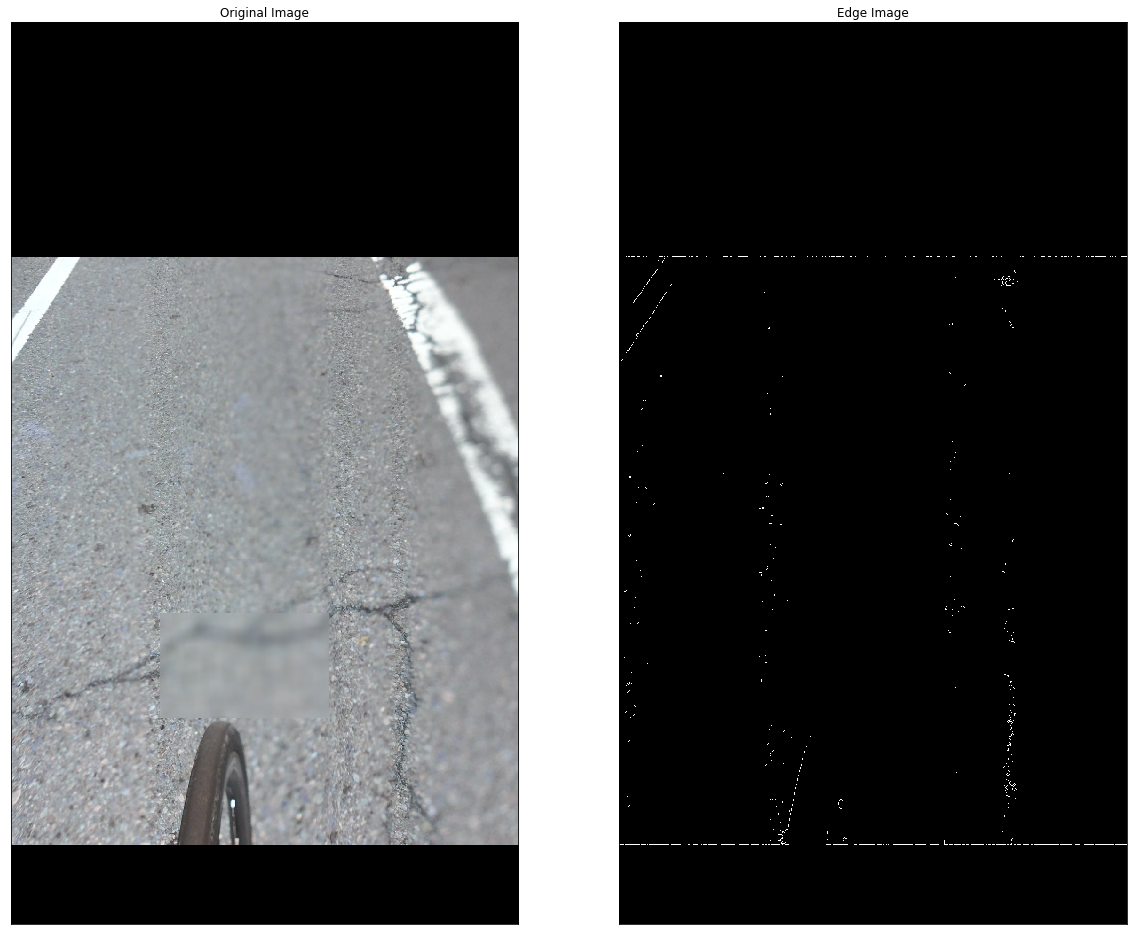

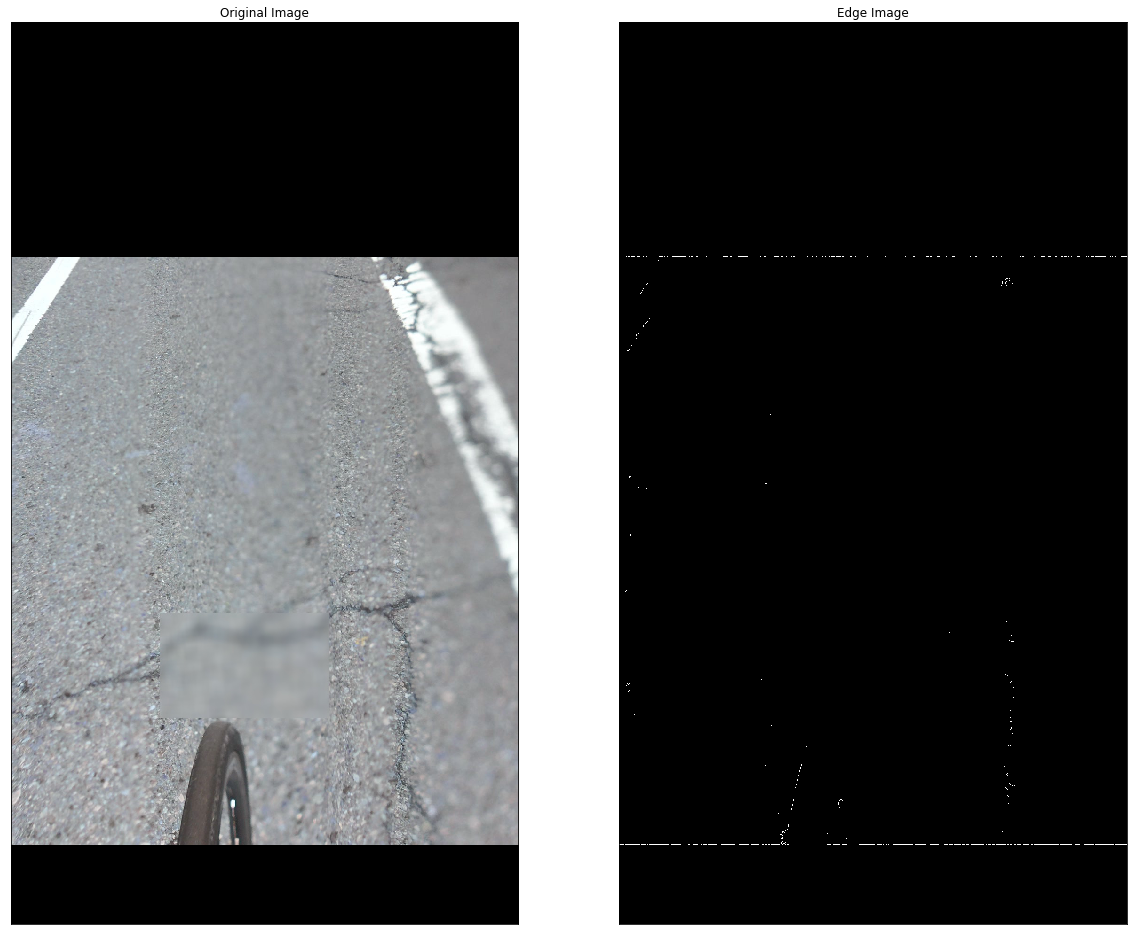

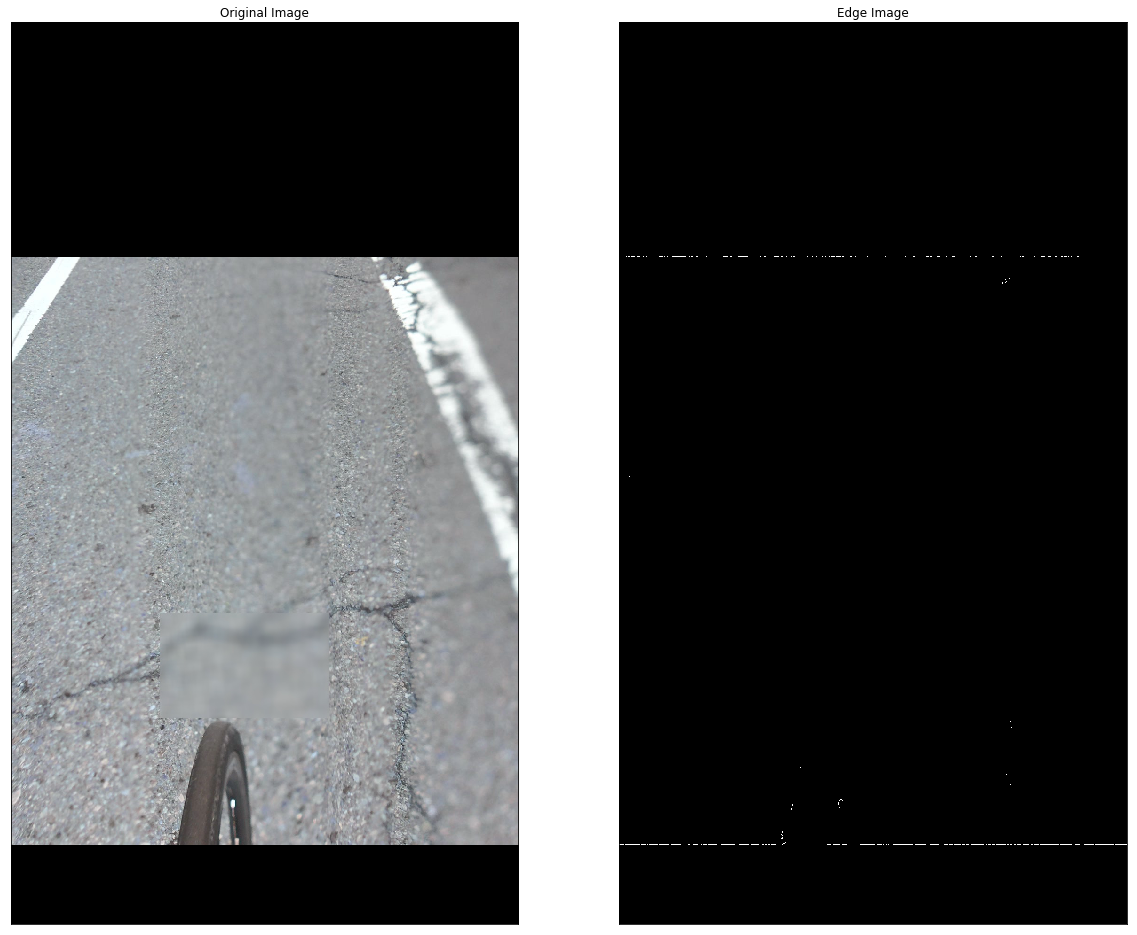

In [54]:
for i in range(100, 600, 100):
    edges = cv2.Canny(masked_rectangle,i,i+100)
    plt.subplot(121),plt.imshow(masked_rectangle, cmap = 'gray')
    plt.title('Original Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(edges, cmap = 'gray')
    plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
    plt.show()